##### In this checkpoint, we are going to work on the 'Expresso churn' dataset that was provided as part of Expresso Churn Prediction Challenge hosted by Zindi platform.

### Dataset description: 
Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.

### Instructions

- Install the necessary packages
- Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
- Based on the previous data exploration train and test a machine learning classifier
- Create a streamlit application (locally)
- Add input fields for your features and a validation button at the end of the form
- Import your ML model into the streamlit application and start making predictions given the provided features values

### Note: 

- This checkpoint should be done locally, (Google colab notebooks won't work)
- Make sure to run the app using the "streamlit run" command in your terminal.

## Variable Definitions

- user_id				
- REGION		the location of each client		
- TENURE		duration in the network		
- MONTANT		top-up amount		
- FREQUENCE_RECH		 number of times the customer refilled		
- REVENUE		monthly income of each client		
- ARPU_SEGMENT		income over 90 days / 3		
- FREQUENCE		number of times the client has made an income		
- DATA_VOLUME		number of connections		
- ON_NET		inter expresso call		
- ORANGE		call to orange		
- TIGO		call to Tigo		
- ZONE1		call to zones1		
- ZONE2		call to zones2		
- MRG		a client who is going		
- REGULARITY		number of times the client is active for 90 days		
- TOP_PACK		the most active packs		
- FREQ_TOP_PACK		number of times the client has activated the top pack packages		
- CHURN		variable to predict - Target		

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# import the label Encoder library 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [3]:
df = pd.read_csv("Expresso_churn_dataset.csv")

In [4]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [6]:
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [7]:
# Drop irrelevant tables
df = df.drop("user_id", axis=1)
df = df.drop("MRG", axis=1)
df = df.drop("ZONE1", axis=1)
df = df.drop("ZONE2", axis=1)
df = df.drop("DATA_VOLUME", axis=1)
df = df.drop("ON_NET", axis=1)
df = df.drop("ORANGE", axis=1)
df = df.drop("TIGO", axis=1)
df = df.drop("REGION", axis=1)
df = df.drop("TOP_PACK", axis=1)
df = df.drop("FREQ_TOP_PACK", axis=1)

In [8]:
df.dropna(subset=['MONTANT'], inplace=True)

In [9]:
df.dropna(subset=['REVENUE'], inplace=True)

In [ ]:
df["FREQ_TOP_PACK"].describe().T

In [12]:
df.describe(include = 'object').T

,count,unique,top,freq
TENURE,1375051,8,K > 24 month,1311332


In [13]:
df["TENURE"].value_counts()

TENURE
K > 24 month     1311332
I 18-21 month      25836
H 15-18 month      14784
G 12-15 month       7951
J 21-24 month       7613
F 9-12 month        5730
E 6-9 month         1338
D 3-6 month          467
Name: count, dtype: int64

In [14]:
df = df.drop_duplicates().reset_index(drop=True)

In [15]:
df = pd.get_dummies(df, columns=['TENURE'])

In [16]:
df.rename(columns={
     'TENURE_D 3-6 month': 'Between_3to6',
     'TENURE_E 6-9 month': 'Between_6to9',
     'TENURE_F 9-12 month': 'Between_9to12',
     'TENURE_G 12-15 month': 'Between_12to15',
     'TENURE_H 15-18 month': 'Between_15to18',
     'TENURE_I 18-21 month': 'Between_18to21',
     'TENURE_J 21-24 month': 'Between_21to24',
     'TENURE_K > 24 month': 'More_than_24'
}, inplace=True)

In [17]:
df.to_csv("Expresso_churn_dataset_cleaned.csv", index = False)

In [18]:
df.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,REGULARITY,CHURN,Between_3to6,Between_6to9,Between_9to12,Between_12to15,Between_15to18,Between_18to21,Between_21to24,More_than_24
0,4250.0,15.0,4251.0,1417.0,17.0,54,0,False,False,False,False,False,False,False,True
1,3600.0,2.0,1020.0,340.0,2.0,17,0,False,False,False,False,False,False,False,True
2,13500.0,15.0,13502.0,4501.0,18.0,62,0,False,False,False,False,False,False,False,True
3,1000.0,1.0,985.0,328.0,1.0,11,0,False,False,False,False,False,False,False,True
4,8500.0,17.0,9000.0,3000.0,18.0,62,0,False,False,False,False,False,False,False,True


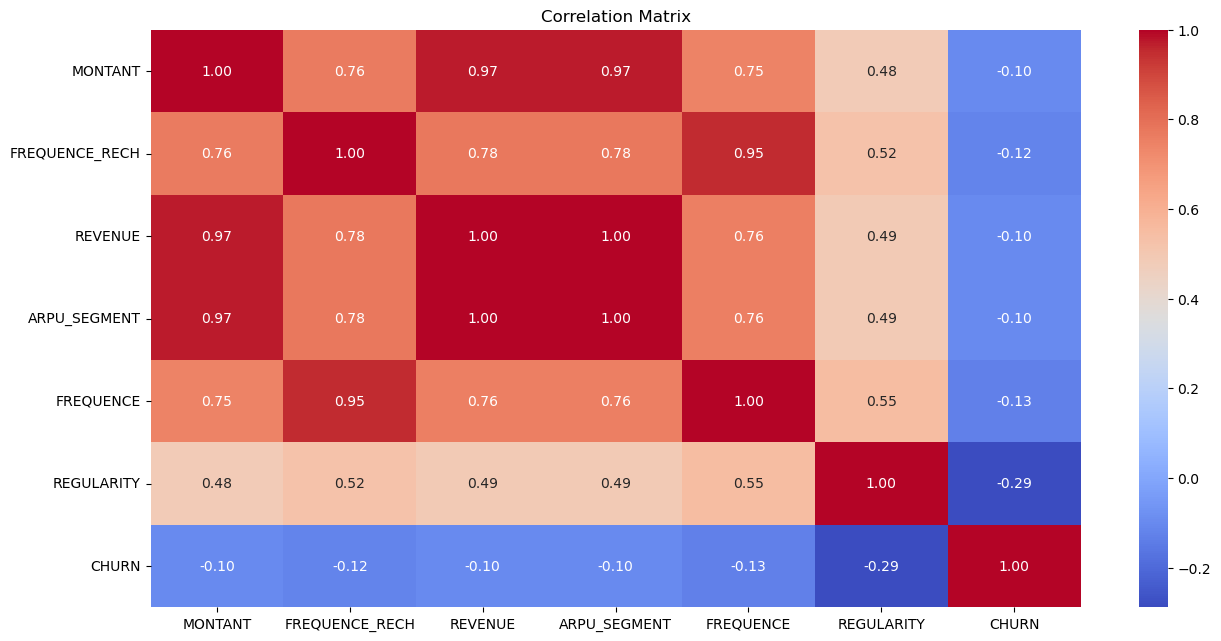

In [19]:
numerical_features = df.select_dtypes(include='number').columns
numerical_features
plt.figure(figsize=(15, 7.5))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
import pandas as pd
df = pd.read_csv("Expresso_churn_dataset_cleaned.csv")

In [21]:
df

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,REGULARITY,CHURN,Between_3to6,Between_6to9,Between_9to12,Between_12to15,Between_15to18,Between_18to21,Between_21to24,More_than_24
0,4250.0,15.0,4251.0,1417.0,17.0,54,0,False,False,False,False,False,False,False,True
1,3600.0,2.0,1020.0,340.0,2.0,17,0,False,False,False,False,False,False,False,True
2,13500.0,15.0,13502.0,4501.0,18.0,62,0,False,False,False,False,False,False,False,True
3,1000.0,1.0,985.0,328.0,1.0,11,0,False,False,False,False,False,False,False,True
4,8500.0,17.0,9000.0,3000.0,18.0,62,0,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042214,900.0,4.0,686.0,229.0,5.0,55,0,False,False,False,False,False,False,False,True
1042215,2000.0,4.0,1997.0,666.0,5.0,21,0,False,False,False,False,False,False,False,True
1042216,4800.0,4.0,4800.0,1600.0,14.0,62,0,False,False,False,False,False,False,False,True
1042217,6100.0,15.0,5800.0,1933.0,15.0,55,0,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming limited_df is your DataFrame containing the features and target variable
X, y = df.drop("CHURN", axis=1), df["CHURN"]  # Replace 'target' with your actual column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "XgBoost": xgboost.XGBClassifier()
}

best_model = None
best_f1 = float("-inf")

# Train each model and evaluate its performance
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model using accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{name}:\n Accuracy: {accuracy:.4f}\n Precision: {precision:.4f}\n Recall: {recall:.4f}\n F1-score: {f1:.4f}\n")
    
    # Select the best model based on F1-score
    if f1 > best_f1:
        best_f1 = f1
        best_model = name

print(f"\nBest Model: {best_model}\n Best F1-score: {best_f1:.4f}")


Logistic Regression:
 Accuracy: 0.9578
 Precision: 0.9242
 Recall: 0.9578
 F1-score: 0.9372

Ridge Classifier:
 Accuracy: 0.9579
 Precision: 0.9175
 Recall: 0.9579
 F1-score: 0.9372



In [ ]:
with open("churn_analysis.py", "w") as file:
    file.write('''
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Downloads/Expresso_churn_dataset_cleaned.csv")

# Assuming 'target' column contains the labels for whether a person has a bank account or not
X = df.drop(columns=['CHURN'])  # Features
Y = df['CHURN']  # Target labels


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier
gb_clf = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=100,
    subsample=1.0
)
gb_clf.fit(X_train_scaled, y_train)

# Streamlit app title
st.title("Customer Churn Prediction")

# App description
st.write("""
This app uses **eXtreame Gradient Boosting Classifier** to predict which individuals are most likely to churn from the Service Provider.
""")

# Display the dataset
st.write("### Xpresso Dataset Sample", df.head())

# Sidebar for user inputs
st.sidebar.header('User Input Parameters')

def user_input_features():
    MONTANT = st.sidebar.slider('Recharge Amount', int(df['MONTANT'].min()), int(df['MONTANT'].max()), int(df['MONTANT'].mean()))
    FREQUENCE_RECH = st.sidebar.slider('Recharge Frequency', int(df['FREQUENCE_RECH'].min()), int(df['FREQUENCE_RECH'].max()), int(df['FREQUENCE_RECH'].mean()))
    REVENUE = st.sidebar.slider('Revenue', int(df['REVENUE'].min()), int(df['REVENUE'].max()), int(df['REVENUE'].mean()))
    ARPU_SEGMENT = st.sidebar.slider('income over 90days/3', int(df['ARPU_SEGMENT'].min()), int(df['ARPU_SEGMENT'].max()), int(df['ARPU_SEGMENT'].mean()))
    FREQUENCE = st.sidebar.slider('Client monthly income', int(df['FREQUENCE'].min()), int(df['FREQUENCE'].max()), int(df['FREQUENCE'].mean()))
    REGULARITY = st.sidebar.slider('Regularity', int(df['REGULARITY'].min()), int(df['REGULARITY'].max()), int(df['REGULARITY'].mean()))
    Duration_of_use = st.sidebar.selectbox('Duration_of_use', ['Between_3to6', 'Between_6to9', 'Between_9to12', 'Between_12to15', 'Between_15to18', 'Between_18to21', 'Between_21to24', 'More_than_24'])
    
    data = {
        'MONTANT': MONTANT,
        'FREQUENCE_RECH': FREQUENCE_RECH,
        'REVENUE': REVENUE,
        'ARPU_SEGMENT': ARPU_SEGMENT,
        'FREQUENCE': FREQUENCE,
        'REGULARITY': REGULARITY,
        'Duration_of_use': Duration_of_use
    }

    # Convert the input data into a DataFrame
    features = pd.DataFrame(data, index=[0])
    
    # Align the features with the training data (adding missing columns if necessary)
    features = features.reindex(columns=X_train.columns, fill_value=0)
    
    return features

input_df = user_input_features()

# Make predictions based on user input
prediction = gb_clf.predict(input_df)
prediction_proba = gb_clf.predict_proba(input_df)

# Display the prediction results
st.subheader('Prediction')
st.write(f"Predicted Bank Account Status: {'Will churn' if prediction[0] == 1 else 'Will not churn'}")

st.subheader('Prediction Probability')
st.write(prediction_proba)

# Feature importance visualization
st.subheader('Feature Importance')
importance = gb_clf.feature_importances_
features = X.columns
plt.barh(features, importance)
st.pyplot(plt)
''')

In [ ]:
df